# Airfare Prediction Project With Machine Learning
##### Dylan Rybacki

## Project Overview

This project is an attempt to predict the airfare of flights, first by exploring the data set, preprocessing the data set for predictive models, finding an ideal model, and creating a user interface for the model's predictions in hopes to extract insights into the aviation industry and how airlines price their flights. 

#### 1. Data Exploration

    * Dataset will be analyzed for features present
    * Explores statistics to gain understanding of the distribution of some features

#### 2. Data Visualization

    * Dataset will be further explored with the graphical help of matplotlib, seaborne, and plotly
    * Derive insights from the dataset
    * Explore the relationship between features

#### 3. Pre-Processing and Feature Engineering
    * Identifying which features are to be predictor features of price
    * Engineering a day of the week feature
    * One hot encoding categorical data
    * Display feature coorelation table
    * Splitting data into training and testing

#### 4. Modeling
    * Testing performace of linear regression on data
    * Analyze other models such as Lasso, Ridge, Decision Tree, Random Forrest, and XGBoost
    * Determine best model using $R^2$ and $RMSE$ and hyperparameter tuning to optimize it
    * Save model to be used in user interface

#### 5. Conclusion

### Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.tools as tls
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
from pySankey.sankey import sankey

In [2]:
import plotly.io as pio
pio.renderers.default = "iframe_connected" 

## 1. Data Exploration

This is a data set from Kaggle (https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction/data) about airfair prices over various airlines between major Indian cities. The data has features such as airline, origin, destination, class, number of stops, price, and more. In this project, I hope to be able to create a model that can accuratly predict airfare given different specifications for the variables. Although given the dataset, the model won't be able to be used as a way of predicting flight prices within the US due to limited availibility of such data and APIs to scrape it, this project acts as a proof of concept that such a model is feasible. A fully functional model would be particulary helpful to consumers giving them insight into what prices they could typically find for a given route and an optimal time to make a booking. 

In [3]:
#Loading in data from Kaggle dataset and display
df = pd.read_csv('FlightPricePrediction/Clean_Dataset.csv')
df


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
df.price.describe() #summarizes the prices within the dataframe

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

The prices are in Rupees and range from about 1105 to 123071 with a mean of 20890 and a standard deviation of 22698. This shows how the prices of these flights vary greatly.

In [4]:
df.source_city.value_counts() #displays the number of flights in the dataset from each source city

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

In [5]:
df.airline.value_counts() #displays the number of flights per airline

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [6]:
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0]) #verifying no missing values

Series([], dtype: int64)


In [7]:
df['class'].value_counts() #displays the number of flights by class in df

Economy     206666
Business     93487
Name: class, dtype: int64

In [8]:
df.stops.value_counts() #displays the number of stopovers for each datapoint in the dataframe

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

In [9]:
df.days_left.describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

## 2. Visualizing the Dataset

In [5]:
#When do the flights leave
freq = df.days_left.value_counts() #creates a series where each index is the days until departure and its value is its frequency of appearance in the dataset
fig = px.bar(freq, x= freq.index, y = freq.values)
fig.update_xaxes(title_text='Days Until Departure') #changes x axis label
fig.update_yaxes(title_text='Frequency') #changes y axis label

fig.show()

In [6]:
freq = df.source_city.value_counts() #series of the number of flights from each source city index by the city name
#create interactive plot of bar chart to visually represent number of flights out of source city using plotly express
fig = px.bar(freq, x= freq.index, y = freq.values, labels = {'x': 'Origin City', 'y': 'Flights'}, title = 'Number of Flights Out of Origin Destinations of Dataset')
fig.update_xaxes(title_text='Origin City') #changes x axis label
fig.update_layout(width=800, height=600) #adjusts dimention of plot

#shows plot
fig.show()


In [7]:
#makes pie chart to see proportion of flights from each source city
fig = px.pie(freq, names=freq.index, values=freq.values, title='Percent of Flights Out of Origin Destinations') 
fig.update_layout(width=600, height=600) 
fig.update_traces(textinfo='percent+label') #Adds lable to chart

fig.show()

The graphs above show that in this dataset, Delhi and Mumbai are the two most common origins for flights.

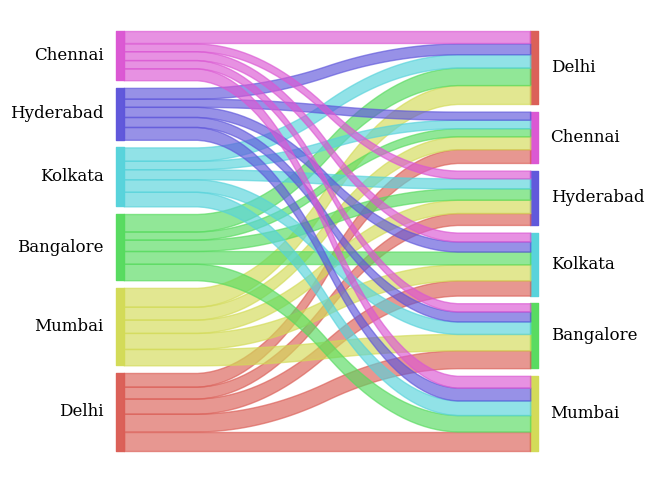

In [13]:
skplt = sankey(df['source_city'], df['destination_city'], aspect=20, fontsize=12)


This sankey graph visualizes the weight of each origin airport going to each destination airport. Given that the thickness of the lines are relatively even, it can be noted that there is no route in this dataset that is particularly over-represented of under-represented.

In [8]:
median_prices = df[df['class'] == 'Economy'].groupby('days_left')['price'].median() #gives a series of the median prices per each days left for economy class tickets

y = median_prices.values
x = -median_prices.index #Days were inverted to represent 'days until departure' with a -5 meaning that the data point represents the price of the flight 5 days before departure
#Creats a line plot comparing the median price of economy class tickets to visualize the trend of flight prices compared to booking time
plt.plot(x, y)
plt.xlabel('Days Until Departure')
plt.ylabel('Median Price')
plt.title('Median Economy Class Prices by Days')

#converts mpl to plotly for interactive graph
mpl_fig = plt.gcf()
plotly_fig = tls.mpl_to_plotly(mpl_fig) 

plotly_fig.show()

In [9]:
#Similar process to above for Business class prices
median_prices = df[df['class'] == 'Business'].groupby('days_left')['price'].median() #gives a series of the median prices per each days left for business class tickets

y = median_prices.values
x = -median_prices.index 

plt.plot(x, y)
plt.xlabel('Days Until Departure')
plt.ylabel('Median Price')
plt.title('Median Business Class Prices by Days')

#converts mpl to plotly for interactive graph
mpl_fig = plt.gcf()
plotly_fig = tls.mpl_to_plotly(mpl_fig) 

plotly_fig.show()

The above graph shows how the median price of flights change as the departure day approaches. Typically, as the departure day gets closer, the price of the flights significantly increases. To see this trend on a more case by case basis, the below graphs show flights the median prices of flights beginning at Delhi to each destination city. This graphs shows that such a trend still holds.

<AxesSubplot:xlabel='days_after', ylabel='price'>

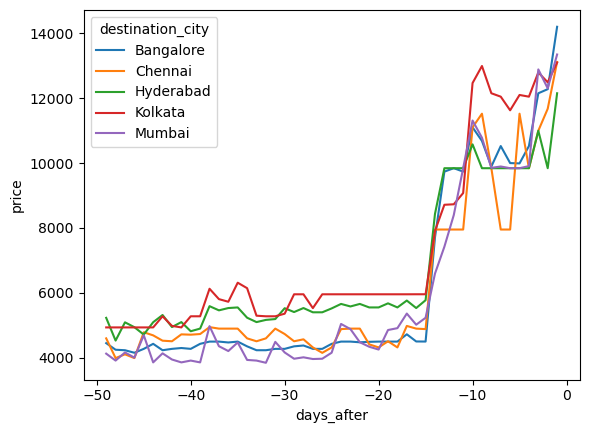

In [11]:
#filter df so that the class is in economy and the source city is from Delhi
xdf = df[
    (df.source_city == 'Delhi') &
    (df['class'] == 'Economy')
]

median_prices = xdf.groupby(['destination_city', 'days_left'])['price'].median().reset_index() #creates a data frame with three columns with days_after, price, and destination
median_prices['days_after'] = -1 * median_prices['days_left'] #inverts days for more intuitive visualization

#creates plot using seabourne stratifid by destination
sns.lineplot(data = median_prices, x = 'days_after', y = 'price', hue = 'destination_city')


In [12]:
#same graph but interactive
fig = px.line(median_prices, x = 'days_after', y = 'price', color = 'destination_city') #plotly for interactive plot
fig.update_layout(title={'text': 'Airfare from Delhi (Economy Class) Compared to Departure Date'}, width=800, height=400)

fig.show()

In [13]:
freq = df.airline.value_counts()
print(freq)

#makes pie chart to see proportion of airline 
fig = px.pie(freq, names=freq.index, values=freq.values, title='Percent of Flights By Airline') 
fig.update_layout(width=600, height=600) 
fig.update_traces(textinfo='percent+label') #Adds lable to chart

fig.show()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64


The above shows the proportion of airlines share amongst the flights in the dataset. Vistara by far the most representative airline within the dataset followed by Air India. However, SpiceJet has very little representation in the data. This can effect the efficacy of the model amongst these airlines with fewer data as they don't have as much information to draw from.

In [14]:
#filter df so that the class is in economy and the source city is from Delhi
xdf = df[
    (df.source_city == 'Delhi') &
    (df['class'] == 'Economy')
]

median_prices = xdf.groupby(['airline', 'days_left'])['price'].median().reset_index() #creates a data frame with three columns with days_after, price, and destination
median_prices['days_after'] = -1 * median_prices['days_left'] #inverts days for more intuitive visualization

fig = px.line(median_prices, x = 'days_after', y = 'price', color = 'airline') #plotly for interactive plot
fig.update_layout(title={'text': 'Airfare from Delhi (Economy Class) Compared to Departure Date'}, width=800, height=400)

fig.show()

## 3. Pre-Processing and Feature Engineering

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV

### Engineering a day of the week feature

One feature that I believe to be key for predicting the price of airfare is the day of the week. However, given this data, there was no column that gave a direct date or day of the week. One solution that could solve this issue is taking each 'days_left' and finding its remainder after dividing by 7 using the modulo function. This should map each day of the week to a number 0 to 6 which can then be mapped into a categorical day of the week which will then be one hot encoded for modeling. Per the source of the data set, the data was all scraped on the same day with the first flight being on February 11th, 2022 so this methedology should be accurate. That day was a Friday so the mapping should be the following: 0 -> Thursday, 1 -> Friday, 2 -> Saturday, 3 -> Sunday, 4 -> Monday, etc..

In [16]:
df['nDayOfWeek'] = df['days_left'] % 7 #assign each day of the week to a number 1-7
Daymapping = {
    0: 'Thursday',
    1: 'Friday',
    2: 'Saturday',
    3: 'Sunday',
    4: 'Monday',
    5: 'Tuesday',
    6: 'Wednesday'
}
df['DayOfWeek'] = df['nDayOfWeek'].map(Daymapping) #This feature will eventually be one hot encoded, but is left as categorical for now to explore

df.loc[np.random.choice(df.index, 10, replace=False), ['days_left' , 'nDayOfWeek', 'DayOfWeek']] #picks a random selection of 10 data points to ensure proper feature creation

,days_left,nDayOfWeek,DayOfWeek
100904,39,4,Monday
22215,14,0,Thursday
118540,37,2,Saturday
269569,38,3,Sunday
297004,26,5,Tuesday
78853,13,6,Wednesday
235520,19,5,Tuesday
74652,32,4,Monday
23911,23,2,Saturday
131897,29,1,Friday


Now that this day of week feature is created, the data can be explored in terms of the day of the week. We would expect the number of flights in the data set to be relatively similar.

In [17]:
freq = df.DayOfWeek.value_counts()
print(freq)

Monday       44067
Wednesday    44021
Tuesday      44015
Thursday     43995
Sunday       42391
Saturday     41777
Friday       39887
Name: DayOfWeek, dtype: int64


In [18]:
#makes pie chart to see proportion of flights for each day of the week
fig = px.pie(freq, names=freq.index, values=freq.values, title='Percent of Flights From Day of Week') 
fig.update_layout(width=600, height=600) 
fig.update_traces(textinfo='percent+label') #Adds lable to chart

fig.show()

It's common advice that if you are trying to save money on airfare, you shouldn't book flights for Fridays. We can validate this claim amongst the dataset by comparing the mean economy price ticket for a certain route. For the sake of the following analysis, I will use Dehli to Bangalore.

In [19]:
#filter df so that the class is in economy and the source city is from Delhi and Destination is Bangalore
xdf = df[
    (df.source_city == 'Delhi') &
    (df.destination_city == 'Bangalore') &
    (df['class'] == 'Economy')
]

mean_prices = xdf.groupby(['DayOfWeek'])['price'].mean().sort_values()
print(mean_prices)


DayOfWeek
Tuesday      5861.724184
Thursday     5964.725861
Monday       6007.057564
Wednesday    6045.785319
Friday       6236.297376
Saturday     6479.697349
Sunday       6661.995315
Name: price, dtype: float64


In [20]:
fig = px.bar(mean_prices, x= mean_prices.index, y = mean_prices.values)
fig.update_yaxes(title_text='Mean Price') #changes y axis label
fig.show()

Unsurprisingly, we see that the weekends are the more expensive tickets on average. However, if we do the same analysis with the median prices rather than the mean, the result becomes more interesting.

In [21]:
median_prices = xdf.groupby(['DayOfWeek'])['price'].median().sort_values()
print(median_prices)
fig = px.bar(median_prices, x= median_prices.index, y = median_prices.values)
fig.update_yaxes(title_text='Median Price') #changes y axis label
fig.show()

DayOfWeek
Friday       4500.0
Monday       4500.0
Saturday     4500.0
Thursday     4500.0
Tuesday      4500.0
Wednesday    4500.0
Sunday       4538.0
Name: price, dtype: float64


Now it seems like they are all the days of the week is equal. It is possible that because the data set begins with its first flight on a Friday, and as explored above, prices increase dramatically closer to the day of departure, it could have skewed the mean price of Friday and the weekends up. It's also possible that the result of this very constant median is caused by the pricing strategy of a singular airline around the median that keeps its prices pretty constant. We can explore this trend by making subplots for each airline on this route.

In [22]:
median_prices_al = xdf.groupby(['DayOfWeek', 'airline'])['price'].median().sort_values().reset_index()
print(median_prices_al)

    DayOfWeek    airline   price
0      Friday    AirAsia  3569.0
1     Tuesday    AirAsia  3569.0
2   Wednesday    AirAsia  4019.0
3    Thursday    AirAsia  4019.0
4      Monday    AirAsia  4019.0
5    Saturday    AirAsia  4019.0
6      Friday   GO_FIRST  4205.0
7     Tuesday   GO_FIRST  4205.0
8    Saturday   GO_FIRST  4205.0
9      Monday   GO_FIRST  4205.0
10     Sunday   GO_FIRST  4225.0
11  Wednesday   GO_FIRST  4284.5
12   Thursday   GO_FIRST  4324.0
13     Sunday    AirAsia  4469.0
14     Monday     Indigo  4500.0
15  Wednesday     Indigo  4500.0
16   Saturday     Indigo  4500.0
17    Tuesday     Indigo  4500.0
18     Friday     Indigo  4500.0
19   Thursday     Indigo  4500.0
20    Tuesday    Vistara  4501.0
21   Thursday    Vistara  4501.0
22     Friday    Vistara  4501.0
23     Monday    Vistara  4501.0
24  Wednesday    Vistara  4501.0
25   Saturday    Vistara  4501.0
26     Sunday    Vistara  4501.0
27     Sunday     Indigo  4745.0
28     Friday  Air_India  5099.0
29     Sun

In [23]:
fig = px.bar(median_prices_al, x='DayOfWeek', y='price', facet_row= 'airline')
fig.update_yaxes(range=[3000, 6000]) #for better visuals in comapring the difference 
fig.update_layout(width=1200, height=1000) #updates graph dimenstions 
fig.show()

We can now see that the result of the median price along that route being so consitant is that Indigo and Vistara's pricing methods remain constant throughout while the other airlines show more variability between the days of the week.

### Engineering and Selecting rest of features

To process the data into terms such that a regression model can use, I used one hot encoding for the important categorical variables.

In [24]:
tdf = df.drop(['Unnamed: 0', 'flight', 'arrival_time', 'nDayOfWeek'], axis = 1) #drops data not going to be used for regression

tdf = pd.get_dummies(tdf, columns=['source_city', 'airline', 'departure_time', 'destination_city', 'class', 'DayOfWeek']) #one hot econding categorical vars
tdf.head()

,stops,duration,days_left,price,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,...,destination_city_Mumbai,class_Business,class_Economy,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,zero,2.17,1,5953,0,0,1,0,0,0,...,1,0,1,1,0,0,0,0,0,0
1,zero,2.33,1,5953,0,0,1,0,0,0,...,1,0,1,1,0,0,0,0,0,0
2,zero,2.17,1,5956,0,0,1,0,0,0,...,1,0,1,1,0,0,0,0,0,0
3,zero,2.25,1,5955,0,0,1,0,0,0,...,1,0,1,1,0,0,0,0,0,0
4,zero,2.33,1,5955,0,0,1,0,0,0,...,1,0,1,1,0,0,0,0,0,0


In [25]:
#I'm going to assign 'zero' as 0, one as '1', and two_or_more as '2' for the sake of this regression
mapping = {'zero': 0, 'one': 1, 'two_or_more': 2}
tdf['nStops'] = tdf['stops'].map(mapping)
tdf = tdf.drop(['stops'], axis = 1)
tdf.nStops.value_counts()

1    250863
0     36004
2     13286
Name: nStops, dtype: int64

### Creating Training/Testing Split

In [26]:
#Prepping data for modeling. Price is the variable I'm predicting.
X = tdf.drop(['price'], axis = 1) #drops dependent variable to create dataframe of only predicting variables
y = tdf.price #selects dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20) #Training/Testing data split saving 20% of data for training

The below graph shows the coorelation matrix of the data set showing the coorelation between the variables (rounded to two decimal places). From this graph, we can see that the strongest correlator with price is (unsurprisingly) whether the passenger is flying business or economy class. This graph also gives a quick way to visually scan the data for potential multiple colinearity.

In [27]:
fig = px.imshow(tdf.corr().round(2), text_auto = True) #creates coorelation plot showing the coorelation between rows and columns rounded to 2 digits
fig.update_layout(width=1200, height=800) #updates graph dimenstions 
fig.show() #displays graph

## 4. Modeling 

For this project, I will compare models using $R^2$ and Root Mean Squared Error (RMSE). $R^2$ indicates how well the variance in the data is explained by the model, with values closer to 1 signifying a more accurate model. RMSE measures the magnitude of prediction errors, so lower values are preferable. Together, these metrics provide a comprehensive evaluation of model performance by assessing both how well the model explains data variance and its prediction accuracy.

#### Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [29]:
#Testing to see how well a simple linear regression model works on the data.
lr = LinearRegression() #instatiates linear regression model

lr.fit(X_train, y_train) #fits model to training data
lrscore = lr.score(X_test, y_test) #scores the model based on its performance on the training data
print(lrscore) #prints score

0.9101375950128726


A linear model seems to work quite well when scored on the testing data with an $R^2$ of $0.91$

In [30]:
#Cross validation
from sklearn.model_selection import cross_val_score

cvScore = cross_val_score(lr, X_train, y_train, cv=5) #gives scores amongst the linear regression model amongst the 5 different splits of the cross validation procedure
print(cvScore)
print(f'Mean: {cvScore.mean():.4f}   Std: {cvScore.std():.4f}')

[0.90900163 0.91084868 0.9097602  0.90922932 0.90841833]
Mean: 0.9095   Std: 0.0008


This is further verified by testing the model using cross validation amongst 5 splits.

In [31]:
# Predictions on the test set
y_pred = lr.predict(X_test) #creates an array of the model predictions from the testing data
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

testdf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) #creates data frame of actual y (price) values and the models prediction
fig = px.scatter(testdf, x='Actual', y='Predicted', labels={'Actual': 'Actual Values', 'Predicted': 'Predicted Values'}, opacity= 0.5) #plots points of prediction vs actual
fig.update_layout(title = f'Linear Regression Predicted vs Actual      score: {lrscore:.4f} RMSE: {rmse:.4f}' ,width=800, height=800)
fig.add_traces(go.Scatter(x=testdf['Actual'], y=testdf['Actual'], mode='lines', name='Regression Fit', line=dict(color='red', dash='dash'))) #creates a y=x line to show how well the model preeicts


fig.show()

From the graph above however, it seems like the model isn't as good as the $R^2$ value may suggest. A stronger model would be hugging the regression fit line more closely.

#### Searching For A Better Model

Using the default hyperparameters for the following common regression models, we can get a decent idea of which kind of regression would yield the best results after some tuning. For each model, an $R^2$ value will be calculated and paired with a visual.

In [33]:
# Imports Ridge, Lasso, Elastic Net, LARS, Decision Trees, Stochastic Gradient Descent 
from sklearn.linear_model import Ridge, Lasso, ElasticNet, Lars, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import Pipeline

#instatiates test models with default parameters
ridge_reg = Ridge()
lasso_reg = Lasso()
elast_reg = ElasticNet()
lars_reg = Lars()
detr_reg = DecisionTreeRegressor()
stch_reg = SGDRegressor()
rdmfrst = RandomForestRegressor()
gradientBoostRegressor = XGBRegressor()



# Create pipelines for models that require scaling/normalizing
ridge_pipeline = Pipeline([
    ('scaler', Normalizer()),
    ('ridge', ridge_reg)
])

lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', lasso_reg)
])

elastic_net_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('elastic_net', elast_reg)
])

lars_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lars', lars_reg)
])

sgd_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', stch_reg)
])

# Create a dictionary of models to test
models = {
    'Ridge Regression': ridge_pipeline,
    'Lasso Regression': lasso_pipeline,
    'Elastic Net': elastic_net_pipeline,
    'Lars': lars_pipeline,
    'Decision Tree': detr_reg,
    'Stochastic Gradient Descent': sgd_pipeline,
    'Random Forest': rdmfrst,
    'Gradient Boosting': gradientBoostRegressor
}

# Initialize a dictionary to hold the metrics
model_metrics = {
    'Model': [],
    'R^2 Score': [],
    'RMSE': []
}

# Append linear regression metrics
model_metrics['Model'].append('Linear Regression')
model_metrics['R^2 Score'].append(lrscore)
model_metrics['RMSE'].append(rmse)

In [34]:
n_models = len(models) #variable of number of models
fig = sp.make_subplots(rows=n_models, cols=1, subplot_titles=[f"Model {i+1}" for i in range(n_models)]) #create subplot object

#loops through dictionary of models and trains each to the test data in a similar process to with the lienar regression
for i, (model_name, regression_mod) in enumerate(models.items()):
    regression_mod.fit(X_train, y_train)
    temp_txt = regression_mod.score(X_test, y_test)
    y_pred = regression_mod.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))


    testdf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
    scatter_trace = go.Scatter(x=testdf['Actual'], y=testdf['Predicted'], mode='markers', name= f'{model_name} Predictions', opacity= 0.5)

    # Add scatter plot to the subplot
    fig.add_trace(scatter_trace, row=i+1, col=1)
    fig.update_xaxes(title_text='Actual Values', row=i+1, col=1)
    fig.update_yaxes(title_text='Predicted Values', row=i+1, col=1)

    # Add y=x line to show regression fit
    line_trace = go.Scatter(x=[min(testdf['Actual']), max(testdf['Actual'])], y=[min(testdf['Actual']), max(testdf['Actual'])], 
                            mode='lines', name= f'{model_name} Regression Fit', line=dict(color='red', dash='dash'))
    fig.add_trace(line_trace, row=i+1, col=1)

    # Update individual subplot title
    fig.layout.annotations[i]['text'] = f"{model_name} Predicted vs Actual (Score: {temp_txt:.4f}, RMSE: {rmse:.4f})"
    
    # Append metrics to the dictionary
    model_metrics['Model'].append(model_name)
    model_metrics['R^2 Score'].append(temp_txt)
    model_metrics['RMSE'].append(rmse)

# Update the overall layout
fig.update_layout(title="Model Predictions", width=1200, height=500*n_models)

fig.show()

/Users/dylan/anaconda/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning:

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)



/Users/dylan/anaconda/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:649: ConvergenceWarning:

Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.513e+00, with an active set of 1 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps 

In [58]:
# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(model_metrics)

# Print the summary table
print(metrics_df)

# Highlight the best model based on the highest R^2 and lowest RMSE
best_model_r2 = metrics_df.loc[metrics_df['R^2 Score'].idxmax()]
best_model_rmse = metrics_df.loc[metrics_df['RMSE'].idxmin()]

print("\nBest Model Based on R^2 Score:")
print(best_model_r2)

print("\nBest Model Based on RMSE:")
print(best_model_rmse)

                         Model  R^2 Score          RMSE
0            Linear Regression   0.910138   6794.244142
1             Ridge Regression   0.641649  13567.698130
2             Lasso Regression   0.910142   6794.067513
3                  Elastic Net   0.872112   8105.251441
4                         Lars   0.903020   7058.203460
5                Decision Tree   0.975615   3539.301930
6  Stochastic Gradient Descent   0.909616   6813.930833
7                Random Forest   0.985695   2710.773972
8            Gradient Boosting   0.976268   3491.536846

Best Model Based on R^2 Score:
Model        Random Forest
R^2 Score         0.985695
RMSE           2710.773972
Name: 7, dtype: object

Best Model Based on RMSE:
Model        Random Forest
R^2 Score         0.985695
RMSE           2710.773972
Name: 7, dtype: object


#### Random Forrest Regression

Since the random forrest regressor looked and scored the best given default parameters of the the models that were tested, the model will be improved with hyperparameter tuning.

In [35]:
# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Calculate the R-squared score on the test data
rf_score = rf_regressor.score(X_test, y_test)
print("Random Forest Regression score:", rf_score)


Random Forest Regression score: 0.985691815853512


In [36]:
#repeat similar process to above to graph the accuracy of the non-tuned random foresst model
y_pred = rf_regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

testdf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
fig = px.scatter(testdf, x='Actual', y='Predicted', labels={'Actual': 'Actual Values', 'Predicted': 'Predicted Values'}, opacity = 0.5)
fig.update_layout(title = f'Random Forest Regression Predicted vs Actual      score: {rf_score:.4}    RMSE: {rmse:.4f}',width=800, height=800)
fig.add_traces(go.Scatter(x=testdf['Actual'], y=testdf['Actual'], mode='lines', name='Regression Fit', line=dict(color='red', dash = 'dash')))


fig.show()

The Random Foresst Regressor seems to be a significant improvement upon the simple linear model. Hyperparamter tuning may be able to improve the performance of this model.

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [43]:
param_dist = {
    'n_estimators': [100, 200, 300], # Number of trees in the forest
    'max_depth': [None, 10, 20], # Maximum depth of each tree
    'min_samples_split': [2, 5, 10] # Minimum number of samples required to split an internal node
}

rf_regressor = RandomForestRegressor(random_state=42)

# Define the scoring metric (negative mean squared error for RMSE)
scoring = 'neg_mean_squared_error'

# Perform randomized search
rf_random = RandomizedSearchCV(
    estimator=rf_regressor,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring=scoring,
    random_state=42,
    n_jobs=-1,
    verbose = 2
)

rf_random.fit(X_train, y_train)

# Get best parameters and RMSE score
best_params = rf_random.best_params_
best_rmse = np.sqrt(-rf_random.best_score_)
print(f"Best parameters: {best_params}")
print(f"Best RMSE: {best_rmse:.4f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  34.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  34.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  28.7s
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time= 1.1min
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time= 1.3min
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time= 1.3min
[CV] END max_depth=20, min_samples_split=5, n_estimators=100; total time=  45.7s
[CV] END max_depth=20, min_samples_split=5, n_estimators=100; total time=  46.8s
[CV] END max_depth=20, min_samples_split=5, n_estimators=100; total time=  46.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  56.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  54.8s


/Users/dylan/anaconda/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



[CV] END max_depth=None, min_samples_split=10, n_estimators=300; total time= 2.6min
[CV] END max_depth=None, min_samples_split=10, n_estimators=300; total time= 2.8min
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time= 1.5min
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time= 1.6min
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time= 1.6min
[CV] END max_depth=10, min_samples_split=10, n_estimators=200; total time= 1.2min
[CV] END max_depth=10, min_samples_split=10, n_estimators=200; total time= 1.1min
[CV] END max_depth=None, min_samples_split=10, n_estimators=300; total time= 3.7min
[CV] END max_depth=10, min_samples_split=10, n_estimators=200; total time= 1.1min
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time= 1.7min
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=  33.8s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=  33.5s
[CV] END max_d

In [38]:
tuned_rf = RandomForestRegressor(max_depth= None, min_samples_split= 10, n_estimators= 300, random_state= 865) #tuned model based on best grid search

tuned_rf.fit(X_train, y_train)
y_pred = tuned_rf.predict(X_test)
tuned_rf_score = tuned_rf.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))



print("Tuned Random Forest Regression score: ", tuned_rf_score)
print("RMSE: ", rmse)

Tuned Random Forest Regression score:  0.9863925508844272
RMSE:  2643.8723891168715


In [39]:
#Graphing the tuned model's prediction accuracy


testdf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
fig = px.scatter(testdf, x='Actual', y='Predicted', labels={'Actual': 'Actual Values', 'Predicted': 'Predicted Values'}, opacity= 0.5)
fig.update_layout(title = f'Tuned Random Forest Regression Predicted vs Actual   score: {tuned_rf_score:.4f}  RMSE: {rmse:.4f}' ,width=800, height=800)
fig.add_traces(go.Scatter(x=testdf['Actual'], y=testdf['Actual'], mode='lines', name='Regression Fit', line=dict(color='red', dash = 'dash')))


fig.show()

#### Saving Model for Implementation of UI

In [40]:
import joblib

In [41]:
joblib.dump(tuned_rf, 'tuned_flight_price.pkl')


['tuned_flight_price.pkl']

## 5. Conclusion

In this project, I aimed to predict airfare using machine learning models with a dataset from Kaggle. Using exploratory data analysis, I obtained a sense of the dataset though the shares of airlines, distribution of prices, differences in class, and more. I then compared many kinds of machine learning models including Linear Regression, Decision Tree, and many more and determined that a Random Forrest model was the best for this data.The Random Forrest model was tuned using a random GridSearch and then implemented into a user interface that shows users the predicted price given their inputs and a prediction for the ideal booking time. Throughout the process of making this project, I encountered various challenges that were overcome in various ways. Firstly was the computation time and power needed for tuning the random forrest model. I attempted running a GridSearch with an elaborate hyperparameter grid which 5 cross validation folds. After hours of running, I decided to modify the process and reduce the hyperparameter grid, decrease to 3 folds, and do a randomized GridSearch. So, although I may not have found the most ideal model, I found one that was good enough such that it would be only barely worse than a perfectly tuned model without going through the exhausive searching process. Secondly, when comparing models, initially I just ran thorugh each of them without modifying the data to fit the assumption of each model. I later improved on this by standardizing or normalizing the data for the models which required such feature engineering. Although none of those models ended up being the best, I saw significant improvement in their individual performances after adjusting the data to be better suited for those models. Lastly, I decided to implement the feature of days of the week after my intial go at this project because of my knowledge of the industry. Typically, I knew that weekends tended to be more expensive, but the data set had no direct way of knowing what day of the week it was. After reading through the data sets about, I saw the day that the data was scraped and was able to create a way to deduce the day of the week that each flight was on. If I were to do this project again, I would use webscraping techniques to obtain flight information from my home airport so that such a model could help me make better informed decisions about what flights I should book and when.